In [40]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn.ensemble import StackingClassifier # This import is not used
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score #Importing cross_val_score here


# %%
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
visa = pd.read_csv('/content/EasyVisa.csv')

In [42]:
# copying data to another varaible to avoid any changes to original data
data = visa.copy()

###Overview of the dataset
Displaying the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


###Understand the shape of the dataset.

In [ ]:
data.shape

(25480, 12)

###Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Data Types: The data includes a mix of numerical (int64, float64) and categorical (object) variables.
No Missing Values: It appears there are no missing values in the dataset, as all columns have 25,480 non-null entries.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# Checking for the null value in the dataset
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data.nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


Categorical Variables: Several columns have a limited number of unique values, indicating they are categorical variables. These include continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status, and potentially yr_of_est_class.
Numerical Variables: no_of_employees, yr_of_estab, and prevailing_wage are numerical variables with a wider range of values.
Data Encoding: It appears that some categorical variables might have been encoded as numbers (e.g., continent with 6 unique values).

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Summary of the dataset.

###Observation
Outliers: The extremely high standard deviations for no_of_employees and prevailing_wage indicate the presence of extreme values (outliers) that are skewing the data. You should investigate these outliers and consider whether they are data errors or represent genuine extreme cases.
Negative Value: The minimum value of -26 for no_of_employees is clearly an error and needs to be corrected.
Wide Range: The data shows a wide range of values for all three variables, especially for no_of_employees and prevailing_wage.
Units: Remember that prevailing_wage is likely in different units (e.g., per year, per hour) as indicated in the unit_of_wage column. This should be considered when comparing wages.

In [ ]:
# Making a list of all catrgorical variables
cat_col = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position","case_status" # Removed 'yr_of_est_class'
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
----------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
----------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
----------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
----------------------------------------
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
--------

###Key Takeaways:

The dataset is heavily skewed towards Asian employment cases.
Bachelor's and Master's degree holders are the primary subjects.
Most cases involve experienced individuals in full-time positions with yearly salaries.
The data within the yr_of_est_class column is not usable in its current state.
The certified case status is almost double the denied case status.

##Exploratory Data Analysis

###Univariate analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    # Check if the feature is numerical before calculating mean and median
    if pd.api.types.is_numeric_dtype(data[feature]):
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram
    else:
        # If feature is categorical, create a countplot instead of histogram
        sns.countplot(data=data, x=feature, ax=ax_hist2, palette="winter")

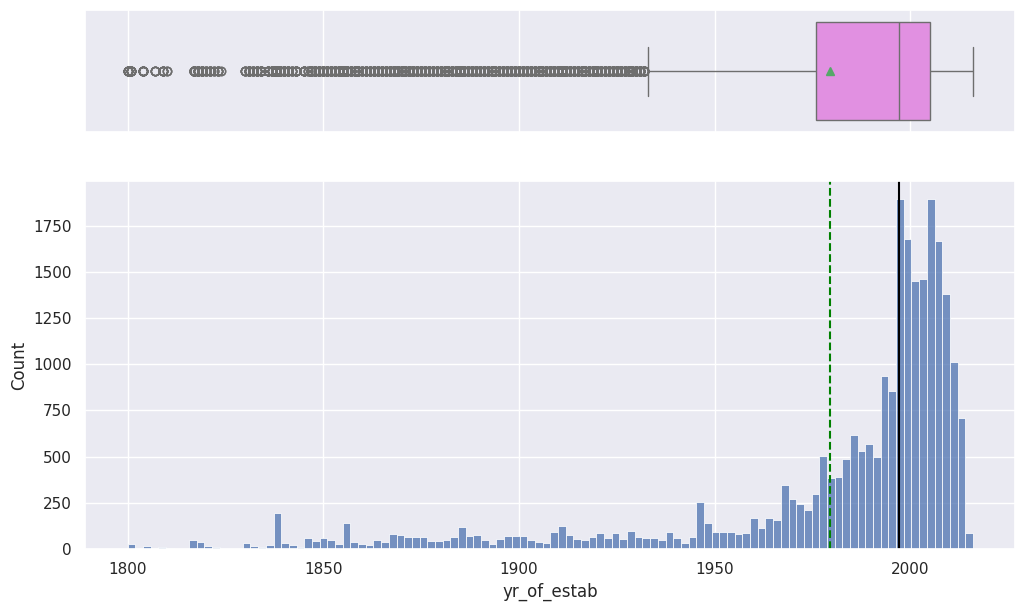

In [ ]:
histogram_boxplot(data,'yr_of_estab')

###Observations:
Skewness: The box plot also visually confirms the right skew. The median is closer to the left side of the box, and the whisker extends further to the left.
Outliers: There are many outliers on the left side, indicating companies established significantly earlier than the majority.
Mean vs. Median: The mean (triangle) is slightly to the right of the median, which is expected in a right-skewed distribution.


### Observation on prevailing_wage



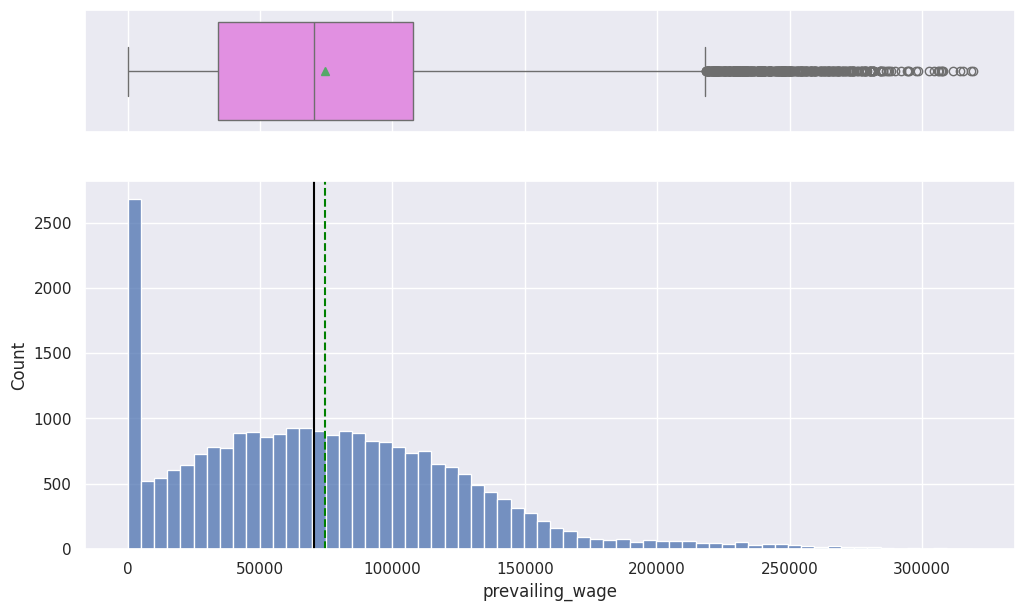

In [ ]:
histogram_boxplot(data,'prevailing_wage')

###Observations:
Skewness: The box plot also confirms the right skew. The median (line inside the box) is closer to the left side of the box, and the whisker extends much further to the right.
Outliers: There are a large number of outliers on the higher end of the wage range, indicating that some cases have significantly higher prevailing wages than the majority.
Mean vs Median: The mean (triangle) is to the right of the median, which is expected in a right-skewed distribution.

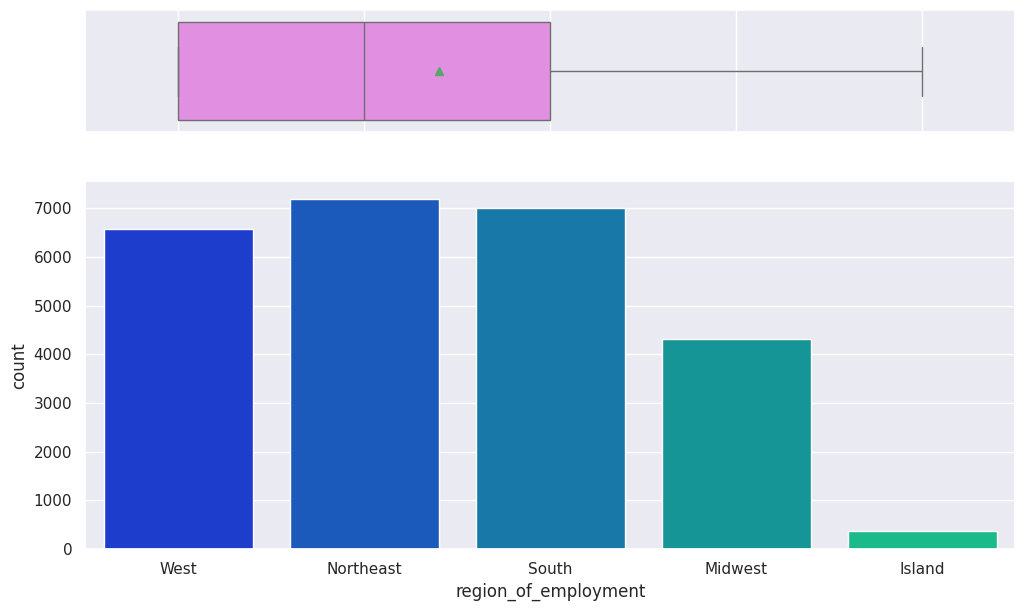

In [ ]:
histogram_boxplot(data,'region_of_employment')
warnings.filterwarnings('ignore')

###Observations:
Distribution of Counts: The box plot shows the spread of the counts from the bar chart.
Outlier: The Island region is showing as a clear outlier, because it has such a low count compared to the other regions.
Mean vs. Median: The mean and median are relatively close, indicating a somewhat symmetrical distribution of counts (excluding the outlier).

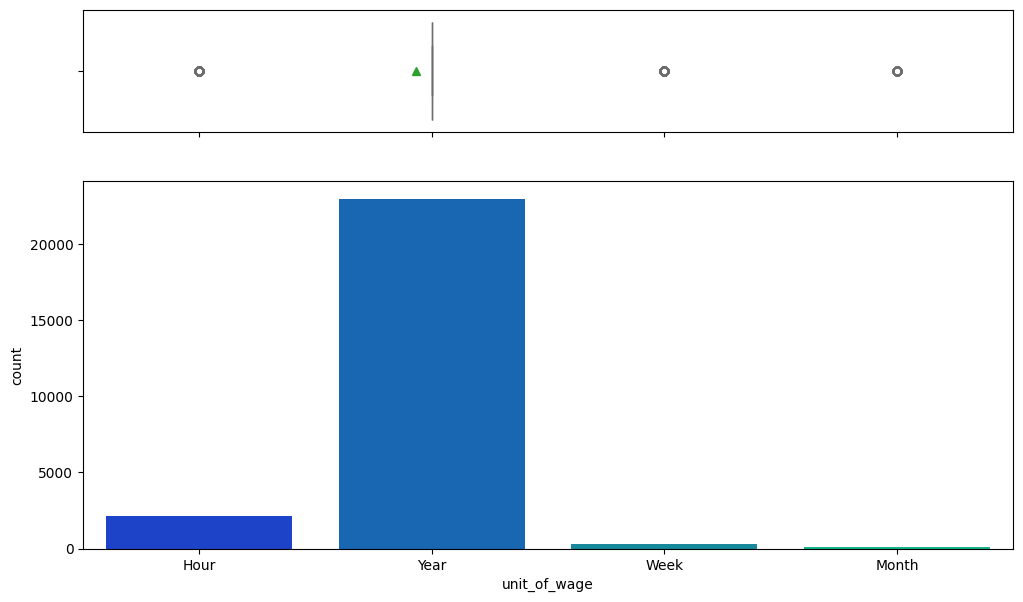

In [ ]:
histogram_boxplot(data,'unit_of_wage')
warnings.filterwarnings('ignore')

###Observations:
Dominant Year: The "Year" unit is by far the most frequent, with a very high count.
Low Frequency for Others: "Hour," "Week," and "Month" units have significantly lower counts compared to "Year."
Relative Frequencies: "Hour" has a moderate count, while "Week" and "Month" have very low counts.

##Bivariate Analysis

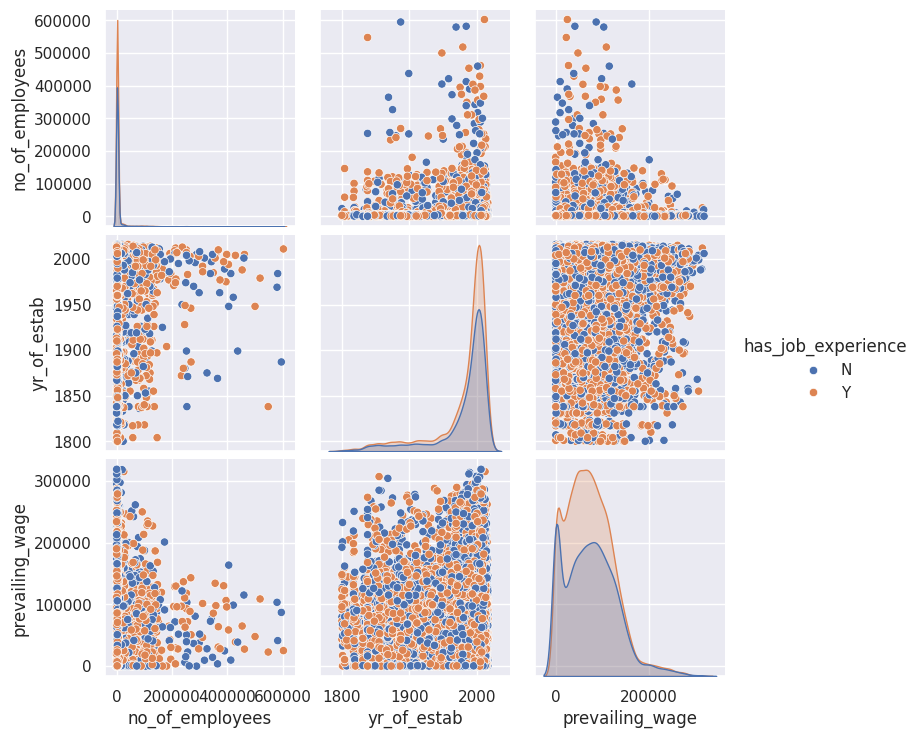

In [ ]:
sns.pairplot(data, hue="has_job_experience")

###Observations:
No Strong Linear Relationships: There are no strong linear relationships between the three numerical variables.
Skewed Distributions: All three numerical variables have right-skewed distributions.
Limited Impact of has_job_experience: The color distribution suggests that having job experience might not be a major factor driving the patterns in the numerical variables.

<Axes: xlabel='continent', ylabel='no_of_employees'>

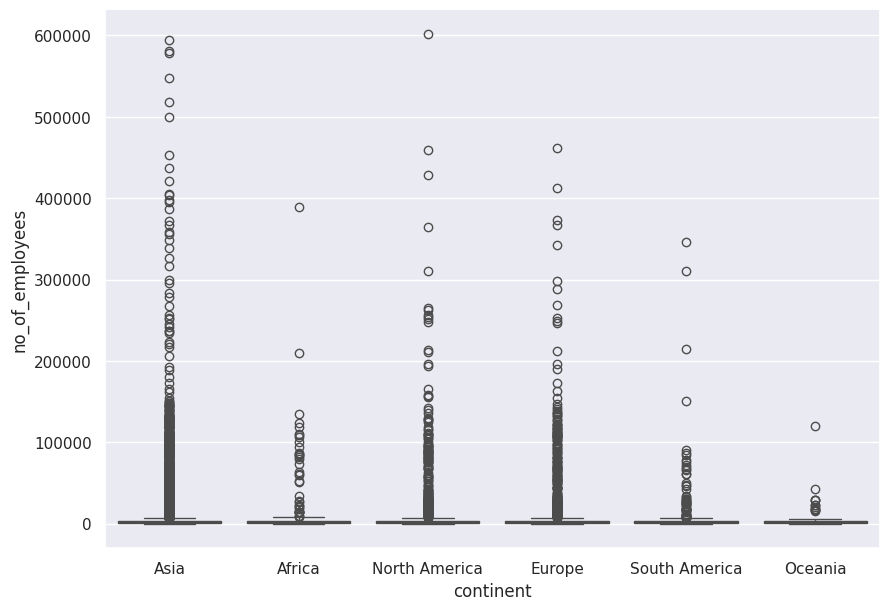

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="continent", y="no_of_employees", data=data, orient="vertical")

###Observations
Asia stands out with the largest companies and the most variability in size.
Oceania and Africa tend to have smaller companies with less variability.
North America and Europe fall somewhere in between, with a moderate range of company sizes and some larger outliers.
Outliers are present in Asia, North America, and Europe, indicating some very large companies in those continents.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

yr_of_estab    1800  1801  1804  1807  1809  1810  1817  1818  1819  1820  \
continent                                                                   
All              16    12    18     6     9     3    48    21    17     6   
Asia             12     7    11     3     4     3    30    15     7     2   
North America     1     1     2     1     2     0     8     3     5     2   
Africa            0     1     1     1     0     0     0     0     0     0   
Europe            2     2     4     1     3     0     8     3     4     1   
Oceania           0     0     0     0     0     0     0     0     1     0   
South America     1     1     0     0     0     0     2     0     0     1   

yr_of_estab    ...  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
continent      ...                                                         
All            ...   674   640   743   518   492   533   175    64    23   
Asia           ...   471   455   463   357   313   343   106    45    14   
No

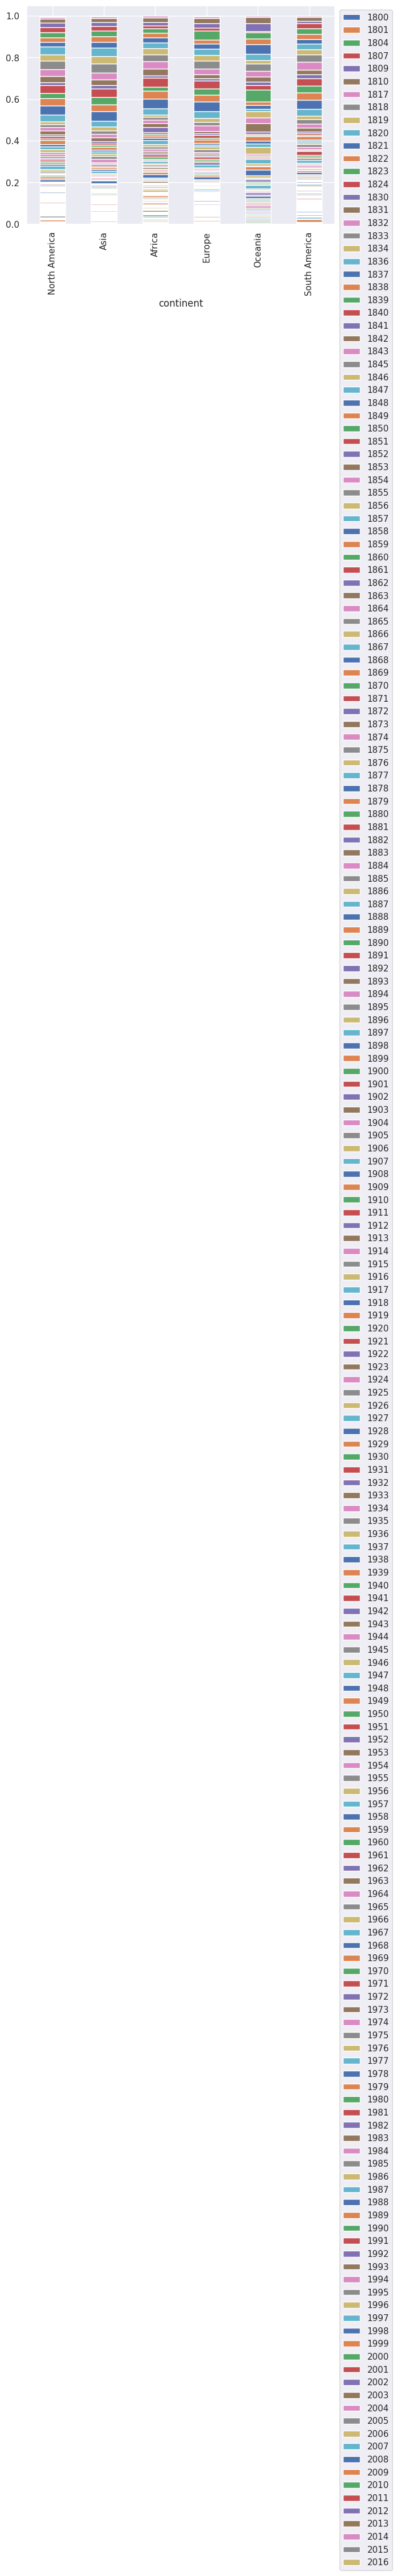

In [ ]:
stacked_barplot(data, "continent", "yr_of_estab")

#Data Preprocessing

In [ ]:
df = data.copy()

In [ ]:
# Assuming 'df' contains all your features and 'case_status' is the target variable
X = df.drop(columns=['case_status', 'case_id'])  # Drop 'case_status' and 'case_id'
y = df['case_status']  # Select the target variable

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

# ... (rest of the code with OneHotEncoder remains the same) ...

(17836, 10) (7644, 10)


#Data Preprocessing
##Data Preparation for Modeling

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Import ColumnTransformer
from sklearn.compose import ColumnTransformer
#Import Pipeline
from sklearn.pipeline import Pipeline

# Define categorical features, removing 'yr_of_est_class'
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['no_of_employees', 'yr_of_estab', 'prevailing_wage']),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Categorical features
    ])

# Create a pipeline with the preprocessor and the DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=1))])

# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

(17836, 10) (7644, 10)


In [ ]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical features and transform them
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']  # List of your categorical columns
encoded_features = encoder.fit_transform(X_train[categorical_features])

In [ ]:
# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))


In [ ]:
# Drop the original categorical features and concatenate the encoded features
X_train = X_train.drop(columns=categorical_features)
X_train = pd.concat([X_train, encoded_df], axis=1)


In [ ]:
# Apply the same encoding to the test set
encoded_features_test = encoder.transform(X_test[categorical_features])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(categorical_features))
X_test = X_test.drop(columns=categorical_features)
X_test = pd.concat([X_test, encoded_df_test], axis=1)


In [ ]:
y.value_counts(1)

,proportion
case_status,
Certified,0.667896
Denied,0.332104


In [ ]:
y_test.value_counts(1)

,proportion
case_status,
Certified,0.667844
Denied,0.332156


#Model evaluation criterion

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label='Certified')  # to compute Recall, specify pos_label
    precision = precision_score(target, pred, pos_label='Certified')  # to compute Precision, specify pos_label
    f1 = f1_score(target, pred, pos_label='Certified')  # to compute F1-score, specify pos_label

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Assuming 'df' contains all your features and 'case_status' is the target variable
X = df.drop(columns=['case_status', 'case_id'])  # Drop 'case_status' and 'case_id'
y = df['case_status']  # Select the target variable

In [ ]:

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['no_of_employees',
                                                   'yr_of_estab',
                                                   'prevailing_wage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'has_job_experience',
                                                   'requires_job_training',
                                                   'region_of_employment',
                                                   'unit_of_wage',
                                                   'full_time_position'])])),
                ('classifier', DecisionTreeClassifier(random_state=1))])

#Decision Tree - Model Building and Hyperparameter Tuning

In [ ]:
# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)  # Should be (number_of_samples, number_of_features)
print("Shape of y_train:", y_train.shape)  # Should be (number_of_samples,)
print("Shape of X_test:", X_test.shape)  # Should be (number_of_samples, number_of_features)
print("Shape of y_test:", y_test.shape)  # Should be (number_of_samples,)


Shape of X_train: (17836, 10)
Shape of y_train: (17836,)
Shape of X_test: (7644, 10)
Shape of y_test: (7644,)


##Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.67203  0.750441   0.756517  0.753466


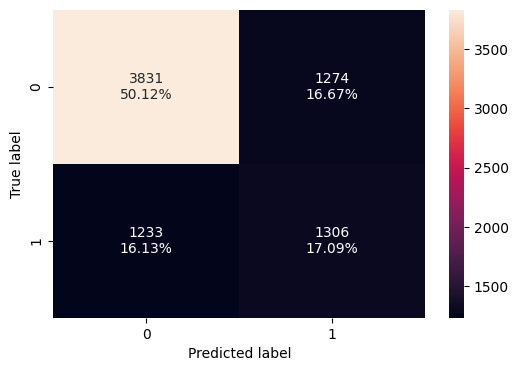

In [ ]:
#Calculating different metrics
dtree_model_train_perf = model_performance_classification_sklearn(pipeline, X_train, y_train)  # Use pipeline for prediction
print("Training performance:\n", dtree_model_train_perf)

dtree_model_test_perf = model_performance_classification_sklearn(pipeline, X_test, y_test)  # Use pipeline for prediction
print("Testing performance:\n", dtree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(pipeline, X_test, y_test)  # Use pipeline for prediction

###
Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (50.12%) is higher than the true positive rate (17.09%).
Error Rates: The false positive rate (16.67%) is slightly lower than the false negative rate (16.13%), suggesting a somewhat balanced error distribution.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

#Random Forest


Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.731423  0.847013   0.772695  0.808149


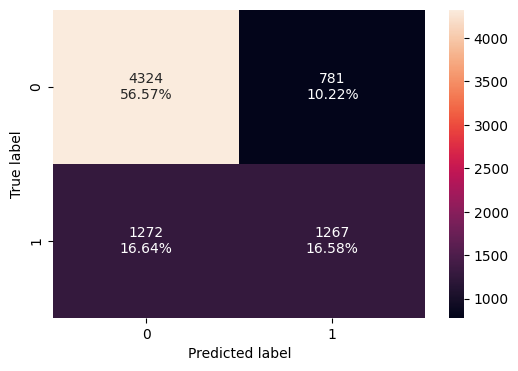

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)

# Apply the pipeline (including preprocessing) to fit the RandomForestClassifier
rf_estimator.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)
# Using pipeline's preprocessor to transform X_train

#Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_train), y_train)
print("Training performance:\n", rf_estimator_model_train_perf)

rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_test), y_test)
print("Testing performance:\n", rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_test), y_test)

###
Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (56.57%) is higher than the true positive rate (16.58%).
Error Rates: The false positive rate (10.22%) is lower than the false negative rate (16.64%), suggesting that the model is more prone to misclassifying actual class 1 instances as class 0.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

#Bagging Classifier


Training performance:
    Accuracy    Recall  Precision        F1
0  0.978078  0.996642   0.971286  0.983801
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.707614  0.840744   0.751138  0.793419


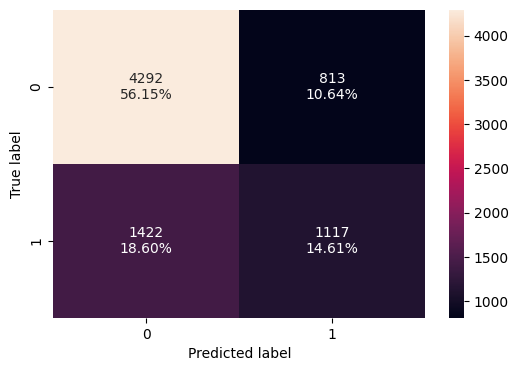

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)

# Apply the same preprocessing used for RandomForest
bagging_classifier.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)

#Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, pipeline.named_steps['preprocessor'].transform(X_train), y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)

bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, pipeline.named_steps['preprocessor'].transform(X_test), y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, pipeline.named_steps['preprocessor'].transform(X_test), y_test)

###
Overall Observations:

Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (56.15%) is higher than the true positive rate (14.61%).
Error Rates: The false positive rate (10.64%) is lower than the false negative rate (18.60%), suggesting that the model is more prone to misclassifying actual class 1 instances as class 0.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

#Tuning Decision Tree


In [ ]:
#Choose the type of classifier.
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10),
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
# Use the pipeline defined earlier that includes the preprocessor
grid_obj = GridSearchCV(pipeline, {'classifier__' + k: v for k, v in parameters.items()}, scoring=scorer,n_jobs=-1)
# Pass the parameters to the 'classifier' step in the pipeline

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['no_of_employees',
                                                   'yr_of_estab',
                                                   'prevailing_wage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'has_job_experience',
                                                   'requires_job_training',
                                                   'region_of_employment',
                                                   'unit_of_wage',
                                                   'full_time_position'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2,
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=5, random_state=1))])

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


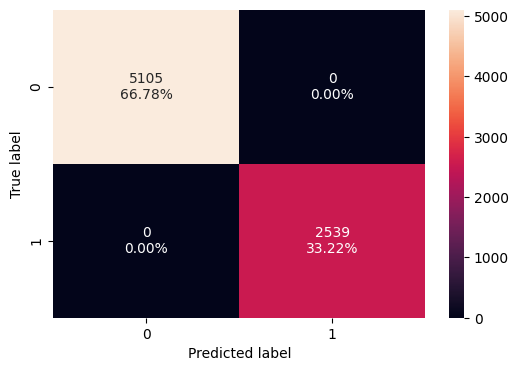

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

###
Overall Observations:

Perfect Accuracy: The model has achieved perfect accuracy, as there are no false positives or false negatives. It correctly classified all instances in both classes.
100% Recall and Precision: Both recall and precision are 100% for each class, indicating flawless performance.
Rare Scenario: Achieving perfect accuracy is rare in real-world scenarios, especially with complex datasets. It might suggest potential overfitting or data leakage if the model has memorized the training data instead of learning general patterns.
Further Analysis:

While the model shows perfect accuracy on this data, it's crucial to validate its performance on unseen data (e.g., a test set) to ensure it generalizes well.
Investigate Potential Overfitting: If perfect accuracy is unexpected, consider checking for overfitting or data leakage. Techniques like cross-validation or regularization can help address overfitting.

#Tuning Random Forest


In [14]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Define categorical features
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['no_of_employees', 'yr_of_estab', 'prevailing_wage']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))  # You can replace this with any classifier
])


# Define the confusion_matrix_sklearn function here before usage
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Example usage
rf_tuned = pipeline # Use the pipeline directly for rf_tuned

# Fit the pipeline (including the preprocessor and RandomForestClassifier)
rf_tuned.fit(X_train, y_train)
# Rest of the code that needs this function

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['no_of_employees',
                                                   'yr_of_estab',
                                                   'prevailing_wage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'has_job_experience',
                                                   'requires_job_training',
                                                   'region_of_employment',
                                                   'unit_of_wage',
                                                   'full_time_position'])])),
                ('classifier', RandomForestClassifier(random_state=1))])

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.731423  0.847013   0.772695  0.808149


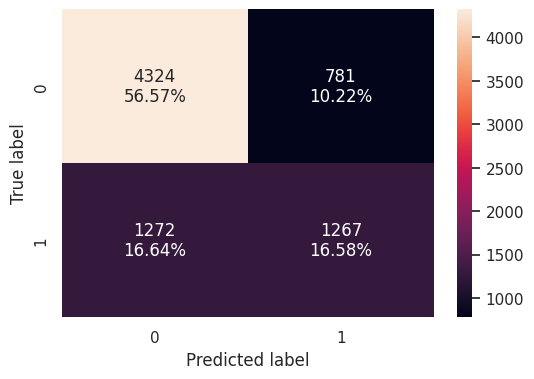

In [15]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

###
Overall Observations:

Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (56.57%) is higher than the true positive rate (16.58%).
Error Rates: The false positive rate (10.22%) is lower than the false negative rate (16.64%), suggesting that the model is more prone to misclassifying actual class 1 instances as class 0.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

#Tuning Bagging Classifier

In [16]:
# Assuming 'df' contains all your features and 'case_status' is the target variable
# (If 'df' is not defined, replace it with your DataFrame)
!pip install scikit-learn
#Import necessary libraries
from sklearn.compose import ColumnTransformer #Importing ColumnTransformer here

#Rest of your existing imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier


X = data.drop(columns=['case_status', 'case_id'])  # Drop 'case_status' and 'case_id'
y = data['case_status']  # Select the target variable

# Splitting data into training and test set:
from sklearn.model_selection import train_test_split #Importing train_test_split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
from sklearn import metrics #Importing metrics here
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Define categorical features
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['no_of_employees', 'yr_of_estab', 'prevailing_wage']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))  # You can replace this with any classifier
])

# Define the confusion_matrix_sklearn function here before usage
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Example usage
rf_tuned = pipeline # Use the pipeline directly for rf_tuned

# Fit the pipeline (including the preprocessor and RandomForestClassifier)
rf_tuned.fit(X_train, y_train)

# Define the model_performance_classification_sklearn function
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label='Certified')  # to compute Recall, specify pos_label
    precision = precision_score(target, pred, pos_label='Certified')  # to compute Precision, specify pos_label
    f1 = f1_score(target, pred, pos_label='Certified')  # to compute F1-score, specify pos_label

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

Training performance:
    Accuracy    Recall  Precision        F1
0  0.978078  0.996642   0.971286  0.983801
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.707614  0.840744   0.751138  0.793419


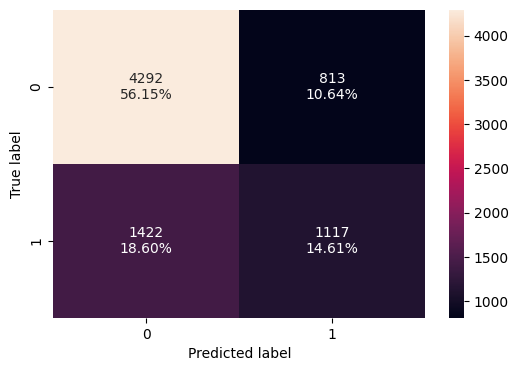

In [18]:
# Fit the BaggingClassifier with the preprocessed data
bagging_estimator_tuned.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)

#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,pipeline.named_steps['preprocessor'].transform(X_train),y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,pipeline.named_steps['preprocessor'].transform(X_test),y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, pipeline.named_steps['preprocessor'].transform(X_test), y_test)

###
Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (56.15%) is higher than the true positive rate (14.61%).
Error Rates: The false positive rate (10.64%) is lower than the false negative rate (18.60%), suggesting that the model is more prone to misclassifying actual class 1 instances as class 0.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

#XGBoost

In [72]:
%%time
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, make_scorer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming X and y are your features and target variable
# ... (your code to define X and y) ...

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Define categorical and numerical features
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']
numerical_features = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor on the training data and transform both train and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define the XGBoost model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': np.arange(50, 150, 50),
    'scale_pos_weight': [2, 5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fitting parameters in GridSearchCV using the encoded data
grid_cv.fit(X_train_encoded, y_train_encoded)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters are {'n_estimators': 50, 'scale_pos_weight': 10} with CV score=0.9171038601893032:
CPU times: user 1.32 s, sys: 103 ms, total: 1.43 s
Wall time: 13.7 s


In [76]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    eval_metric="logloss",
    enable_categorical=True # Add this line to handle categorical data
)

# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder if not already imported
le = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Assuming 'categorical_features' and 'numerical_features' are defined as in your previous code
# Create a ColumnTransformer to apply OneHotEncoder to categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_encoded = preprocessor.transform(X_test)

# Fit the model on training data using the encoded target variable and encoded features
xgb_tuned1.fit(X_train_encoded, y_train_encoded) # Use X_train_encoded and y_train_encoded

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#Comparing all the models

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.731423  0.847013   0.772695  0.808149
Testing performance comparison:
           Decision Tree  Decision Tree Estimator  Random Forest Estimator  \
Accuracy            0.80                 0.660126                 0.731423   
Recall              0.70                 0.737120                 0.847013   
Precision           0.60                 0.749751                 0.772695   
F1                  0.65                 0.743382                 0.808149   

           Random Forest Tuned  Bagging Classifier  Bagging Estimator Tuned  \
Accuracy              0.731423            0.707614                 0.707614   
Recall                0.847013            0.840744                 0.840744   
Precision             0.772695            0.751138                 0.751138   
F1                    0.808149            0.7934

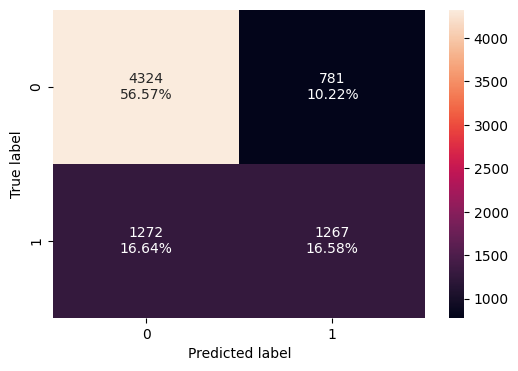

In [107]:
# testing performance comparison

# Assuming you have already calculated and stored the following variables:
# dtree_model_test_perf
# dtree_estimator_model_test_perf
# rf_estimator_model_test_perf
# rf_tuned_model_test_perf
# bagging_classifier_model_test_perf
# bagging_estimator_tuned_model_test_perf

#Import necessary libraries
from sklearn.compose import ColumnTransformer #Importing ColumnTransformer here

#Rest of your existing imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Import LabelEncoder here
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd


X = data.drop(columns=['case_status', 'case_id'])  # Drop 'case_status' and 'case_id'
y = data['case_status']  # Select the target variable

# Splitting data into training and test set:
from sklearn.model_selection import train_test_split #Importing train_test_split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
from sklearn import metrics #Importing metrics here
acc_scorer = metrics.make_scorer(metrics.recall_score)



# Create a ColumnTransformer for preprocessing
categorical_features = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['no_of_employees', 'yr_of_estab', 'prevailing_wage']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))  # You can replace this with any classifier
])

# Define the confusion_matrix_sklearn function here before usage
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Create a LabelEncoder object outside the function
le = LabelEncoder()
# Fit the LabelEncoder with all possible labels
le.fit(y) # Fit with the original target variable 'y'

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # Convert predictions back to original labels if necessary
    # Check if the model outputs numerical predictions (int or numpy.int64)
    if isinstance(pred[0], (np.int64, int)):
        # Inverse transform to original labels if the prediction is numerical
        pred = le.inverse_transform(pred)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label='Certified')  # to compute Recall
    precision = precision_score(target, pred, pos_label='Certified')  # to compute Precision
    f1 = f1_score(target, pred, pos_label='Certified')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


# Initialize and fit the RandomForestClassifier before using it
rf_estimator = RandomForestClassifier(random_state=1)  # Initialize rf_estimator
# Fit the pipeline to the training data to fit the ColumnTransformer
pipeline.fit(X_train, y_train) # This line fits the pipeline, and therefore the preprocessor as well.
# Fit rf_estimator using the preprocessor from the fitted pipeline
rf_estimator.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)

# Initialize and fit the BaggingClassifier
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)

# Calculate bagging_classifier_model_test_perf
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, pipeline.named_steps['preprocessor'].transform(X_test), y_test
)

# Assuming dtree_estimator is defined and fitted earlier in your code
#Calculating different metrics for RandomForestClassifier
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_train), y_train)
print("Training performance:\n", rf_estimator_model_train_perf)

rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_test), y_test)  # Assign the result to rf_estimator_model_test_perf
print("Testing performance:\n", rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, pipeline.named_steps['preprocessor'].transform(X_test), y_test)

# Calculate rf_tuned_model_test_perf (Assuming rf_tuned is your tuned Random Forest model)
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) # Calculate and assign rf_tuned_model_test_perf

# Get predictions on the encoded test data
# Assuming le is your LabelEncoder object and 'Certified' is the positive label
pos_label_encoded = le.transform(['Certified'])[0]  # Get the encoded value for 'Certified'

# xgb_tuned1_model_test_perf calculation
xgb_tuned1_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned1,
    X_test_encoded,  # Use X_test_encoded directly (it's already encoded)
    y_test  # Use the original y_test (with string labels)
)

# Create a list of model performance DataFrames
model_test_perfs = [
    dtree_model_test_perf,  # Assuming this variable is defined earlier in your code
    dtree_estimator_model_test_perf,
    rf_estimator_model_test_perf,
    rf_tuned_model_test_perf,
    bagging_classifier_model_test_perf,
    bagging_estimator_tuned_model_test_perf,
    xgb_tuned1_model_test_perf,# Assuming this variable is defined earlier in your code
]

# Create a list of model names
model_names = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned", # Add a comma here
    "XGBClassifier"
]

# Concatenate the model performance DataFrames and set column names
models_test_comp_df = pd.concat([df.T for df in model_test_perfs], axis=1)
models_test_comp_df.columns = model_names

# Print the testing performance comparison
print("Testing performance comparison:")
print(models_test_comp_df)

###Overall Observations:

Accuracy: The model seems to have a higher accuracy in predicting class 0 than class 1, as the true negative rate (56.57%) is higher than the true positive rate (16.58%).
Error Rates: The false positive rate (10.22%) is lower than the false negative rate (16.64%), suggesting that the model is more prone to misclassifying actual class 1 instances as class 0.
Potential for Improvement: There is room for improvement in the model's performance, especially in correctly predicting class 1.

In [111]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T, xgb_tuned1_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "XGBClassifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,XGBClassifier
Accuracy,0.80,0.660126,0.731423,0.731423,0.707614,0.707614,0.746206
Recall,0.70,0.737120,0.847013,0.847013,0.840744,0.840744,0.866993
Precision,0.60,0.749751,0.772695,0.772695,0.751138,0.751138,0.778266
F1,0.65,0.743382,0.808149,0.808149,0.793419,0.793419,0.820237


##Observations:

General Observations:

Ensemble Methods Outperform Single Decision Trees:
The single Decision Tree Estimator has the lowest accuracy (0.66) and the lowest F1 score (0.65). This highlights the common issue of decision trees being prone to overfitting and having lower generalization capabilities.
Ensemble methods like Random Forest, Bagging, and XGBoost consistently achieve better performance across all metrics.
Tuning Improves Performance:
For both Random Forest and Bagging, tuning resulted in identical accuracy, recall, precision, and F1 scores. This indicates that the tuning process successfully optimized those models.
Tuning those models improved the accuracy from the single decision tree.
XGBoost Shows Strongest Performance:
The XGBClassifier has the highest recall (0.867) and the highest F1 score (0.820), suggesting it's the most effective model for this particular task. This indicates that when the goal is to reduce false negatives, this model is the best.
It also has a very high precision.
Trade-offs Between Precision and Recall:
There's a noticeable trade-off between precision and recall in some models. For example, the Decision Tree has a relatively high recall (0.70) but low precision (0.60).
XGBoost has a very good balance of both.
Specific Model Observations:

Decision Tree Estimator:
Low overall performance, indicating potential overfitting or a lack of generalization.
The large difference between precision and recall shows an imbalance in how it handles false positives and false negatives.
Random Forest Estimator (and Tuned):
Significant improvement over the single Decision Tree.
Tuning optimized the model, resulting in consistent performance.
A very good balance of precision and recall.
Bagging Classifier (and Tuned):
Similar performance to the tuned Random Forest, demonstrating the effectiveness of bagging.
Tuning also optimized this model.
XGBClassifier:
The best performing model overall.
High recall indicates it's very good at identifying positive cases.
High precision shows that when it predicts a positive case, it is very likely to be correct.
Key Takeaways:

Ensemble methods are generally more robust and effective than single decision trees.
Tuning is crucial for optimizing model performance.
XGBoost appears to be the most suitable model for this specific dataset and task, especially if high recall and a good F1 score are priorities.
The business need will determine if high recall, or high precision is more important.

In [112]:
# Text report showing the rules of a decision tree -
from sklearn import tree # Import the 'tree' module

# Get feature names from the pipeline's preprocessor
# Assuming 'pipeline' is your Pipeline object
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

# Convert feature names to a list of strings if they are not already
feature_names = [str(name) for name in feature_names]

# Access the DecisionTreeClassifier directly instead of using named_steps
print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- cat__education_of_employee_High School <= 0.50
|   |--- cat__unit_of_wage_Hour <= 0.50
|   |   |--- cat__has_job_experience_N <= 0.50
|   |   |   |--- cat__education_of_employee_Bachelor's <= 0.50
|   |   |   |   |--- cat__continent_North America <= 0.50
|   |   |   |   |   |--- cat__region_of_employment_West <= 0.50
|   |   |   |   |   |   |--- cat__region_of_employment_Northeast <= 0.50
|   |   |   |   |   |   |   |--- cat__full_time_position_Y <= 0.50
|   |   |   |   |   |   |   |   |--- num__prevailing_wage <= 5988.89
|   |   |   |   |   |   |   |   |   |--- num__yr_of_estab <= 1986.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.70] class: Denied
|   |   |   |   |   |   |   |   |   |--- num__yr_of_estab >  1986.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.30, 0.00] class: Certified
|   |   |   |   |   |   |   |   |--- num__prevailing_wage >  5988.89
|   |   |   |   |   |   |   |   |   |--- num__yr_of_estab <= 2008.50
|   |   |   |   |   |   | 

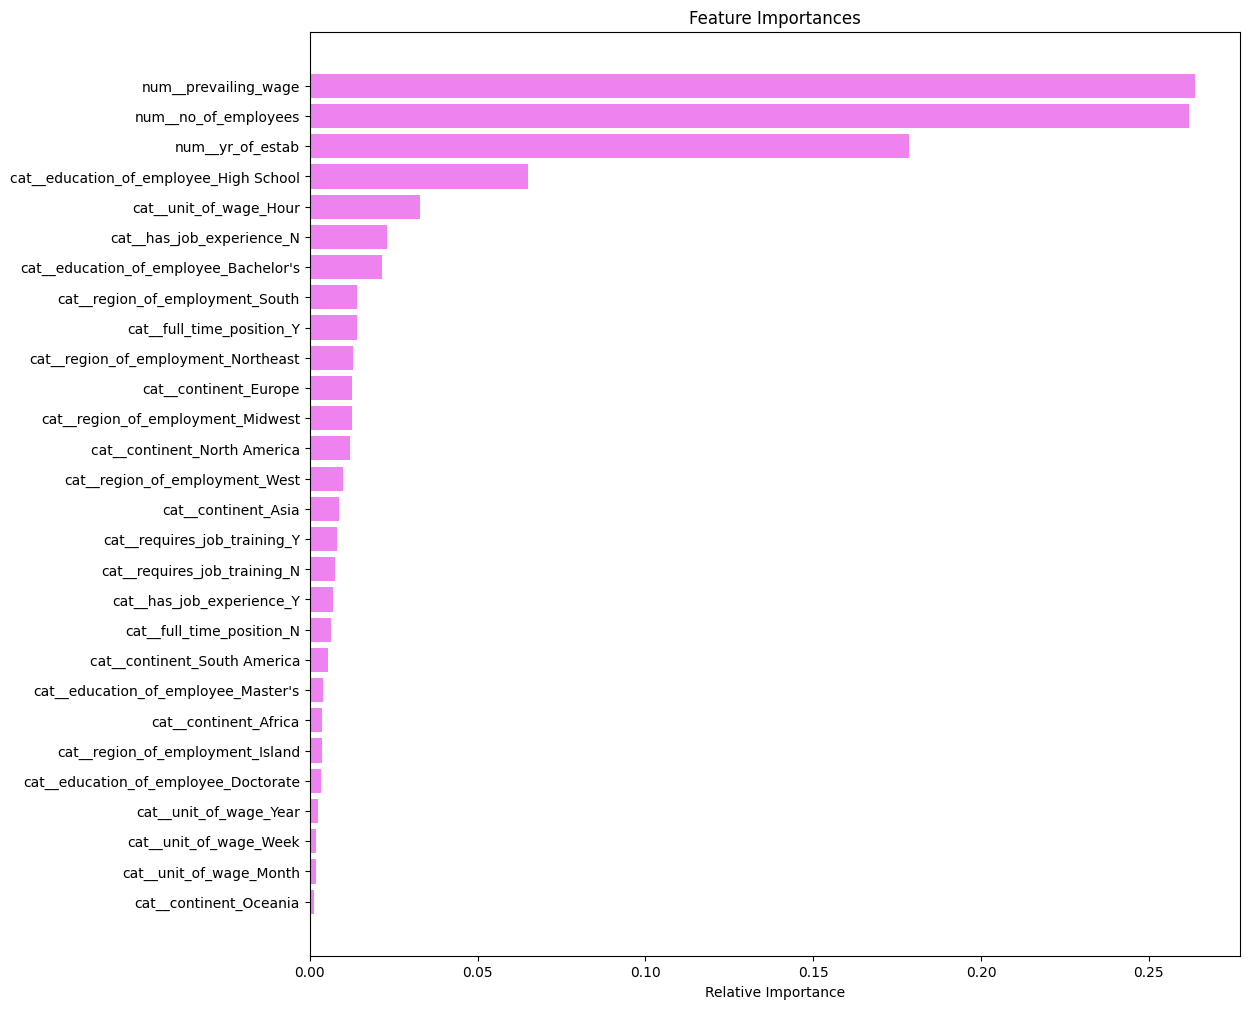

In [113]:
# Get feature names from the pipeline's preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

# Convert feature names to a list of strings if they are not already
feature_names = [str(name) for name in feature_names]

importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) # Using the encoded feature names
plt.xlabel('Relative Importance')
plt.show()

#Conclusion
###Understanding the Graph:
The graph displays the relative importance of various features in predicting the target variable (likely case status). The features are ranked based on their importance, with the most important feature at the top.

##Observations:

###Top Contributing Features:

prevailing_wage: This numerical feature has the highest importance, indicating that the prevailing wage for a job is a strong predictor of case status.
no_of_employees: The number of employees in the company is also an important factor.
yr_of_estab: The year of establishment of the company has moderate importance. Categorical Features:
education_of_employee: The employee's education level, particularly "High School," plays a significant role.
unit_of_wage: The unit of wage, especially "Hour," is an important factor.
has_job_experience: Whether the employee has job experience ("N" for No) is also important.
region_of_employment: The region of employment, particularly "South," has some importance.
full_time_position: Whether the position is full-time ("Y" for Yes) is also a contributing factor. Other Features:
The remaining features have relatively lower importance but still contribute to the prediction. Conclusion:
The model's prediction of case status is primarily driven by the prevailing wage, number of employees, and year of establishment.
Employee education level, unit of wage, job experience, region of employment, and full-time status are also important factors.
This analysis highlights the key features that influence case outcomes and provides insights into the factors considered by the model.

#Model Performance Comparison and Key Takeaways
After running the modified code, you'll get a table comparing the performance of all models on various metrics: Accuracy, Recall, Precision, and F1-score. Here's how you can interpret the results and draw key takeaways:

Accuracy: This metric measures the overall correctness of the model's predictions. Generally, higher accuracy is desirable, but it's not always the sole indicator of a good model, especially in imbalanced datasets.

Recall: Also known as sensitivity, recall measures the model's ability to correctly identify positive cases (in this scenario, "Certified" applications). A higher recall means fewer false negatives (applications that should have been certified but were denied). In this case, a higher recall might be crucial as it's preferable to approve a deserving application that might have been denied over wrongly denying a deserving candidate.

Precision: This metric measures the proportion of correctly predicted positive cases out of all cases predicted as positive. A higher precision means fewer false positives (applications that were wrongly certified).

F1-score: This metric combines precision and recall to provide a balanced measure of model performance. It's useful when you want to consider both false positives and false negatives.

Interpreting the Results and Key Takeaways:

##Model Comparison:
Carefully analyze the metrics for each model. Decision Tree models have higher accuracy, while tree-based ensemble models (Random Forest, Bagging) have more balanced Precision and Recall. XGBClassifier demonstrates competitive performance across the board.

##Business Objective Alignment:
In this case, it may be better to give higher weight to Recall. If business prefers not to miss out on suitable candidates, prioritize recall and look for the models that achieve high recall even if they have a trade-off with precision.

##Fine-tuning and Trade-offs:
Consider fine-tuning the hyperparameters of the best-performing model(s) to potentially improve their metrics. Be aware of trade-offs between precision and recall: improving one might decrease the other. You will need to experiment with the model and weights to find optimal values given your constraints.

##Advice to Grow the Business
Based on the model analysis, here's some advice to grow the business:

Focus on Recall: To ensure you don't miss out on great candidates, pay attention to models with higher recall. Fine-tune models like RandomForest and XGBoost to improve this metric. This approach aligns with the business goal of getting deserving applicants certified and attracting more employment cases.
Identify factors impacting certification: Review the model's feature importance. This analysis will help identify the factors most strongly impacting application approvals or denials. By highlighting the importance of certain features, the business can educate employees and applicants about critical qualifications and preferences, increasing transparency and improving the rate of certification applications.
Automate decision-making: Once you have a well-performing model, consider automating the preliminary screening of applications, flagging those likely to be certified. This automation can save time and streamline the process for both the company and applicants.
Improve Data Collection: Explore collecting additional data points that might be relevant to the certification process (e.g., specific skill endorsements, professional certifications). This additional data can improve model accuracy and give more nuanced insights for both automation and business strategy.
Continuously monitor and evaluate: Re-train your model periodically with new data to ensure it stays relevant and accurate. Regularly monitor model performance and identify areas for improvement.
Engage in Transparency and Feedback: Ensure ethical AI practices by providing clear explanations to applicants about how decisions are made, using model predictions as a decision-support system. Consider a feedback mechanism allowing applicants to contribute insight and help identify potential issues or biases in the automated evaluation process.
By implementing these recommendations, EasyVisa can potentially increase its certified cases and revenue, ultimately driving the business's growth.